In [3]:
#Academic Integrity Statement
# I certify that the code and data in this assignment were generated independently, using only
# the tools and resources defined in the course and that I did not receieve any external help,
# coaching or contributuion during the production of this work. 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Bonus Question Perceptron Model From Scratch

In [6]:
df_peng = pd.read_csv('penguins_lter.csv')

In [7]:
df_peng['Culmen Length (mm)']

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: Culmen Length (mm), Length: 344, dtype: float64

In [24]:
# Preprocessing the dataset

In [8]:
del df_peng['Comments']

df_peng = df_peng.dropna(subset=['Culmen Length (mm)', 'Culmen Depth (mm)','Body Mass (g)','Sex'])

df_peng['Delta 15 N (o/oo)'].fillna((df_peng['Delta 15 N (o/oo)'].mean()), inplace=True)
df_peng['Delta 13 C (o/oo)'].fillna((df_peng['Delta 13 C (o/oo)'].mean()), inplace=True)

df_peng = df_peng[df_peng['Sex'] != '.']

df_peng = pd.get_dummies(df_peng, columns = ["Sex", "Species", "Island"], prefix = ["sex", "Spc", "Isld"])

def minmaxscaling(column):
  lengthmin = column.min()
  lengthmax = column.max()
  newlist = []
  for i in column:
      newlist.append((i-lengthmin)/(lengthmax-lengthmin))

  return newlist

df_peng['Culmen Length (mm)'] = minmaxscaling(df_peng['Culmen Length (mm)'])

df_peng['Culmen Length (mm)'] = minmaxscaling(df_peng['Culmen Depth (mm)'])

df_peng['Flipper Length (mm)'] = minmaxscaling(df_peng['Flipper Length (mm)'])

df_peng['Body Mass (g)'] = minmaxscaling(df_peng['Body Mass (g)'])

newdf = df_peng.iloc[:,7:]



/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
df_peng['Culmen Length (mm)']


0      0.666667
1      0.511905
2      0.583333
4      0.738095
5      0.892857
         ...   
338    0.071429
340    0.142857
341    0.309524
342    0.202381
343    0.357143
Name: Culmen Length (mm), Length: 333, dtype: float64

In [10]:
df_array = newdf.to_numpy()

In [11]:
X = newdf.iloc[:,[0,1,2,3,4,5,8,9,10,11,12,13]]
y = newdf.iloc[:,7]
  
newdf.iloc[:,7]

0      1
1      0
2      0
4      0
5      1
      ..
338    0
340    0
341    1
342    0
343    1
Name: sex_MALE, Length: 333, dtype: uint8

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [13]:
X_train.dtypes

Culmen Length (mm)                               float64
Culmen Depth (mm)                                float64
Flipper Length (mm)                              float64
Body Mass (g)                                    float64
Delta 15 N (o/oo)                                float64
Delta 13 C (o/oo)                                float64
Spc_Adelie Penguin (Pygoscelis adeliae)            uint8
Spc_Chinstrap penguin (Pygoscelis antarctica)      uint8
Spc_Gentoo penguin (Pygoscelis papua)              uint8
Isld_Biscoe                                        uint8
Isld_Dream                                         uint8
Isld_Torgersen                                     uint8
dtype: object

In [14]:
X_train['Spc_Chinstrap penguin (Pygoscelis antarctica)'] = np.int16(X_train['Spc_Chinstrap penguin (Pygoscelis antarctica)'])
X_train['Spc_Adelie Penguin (Pygoscelis adeliae)'] = np.int16(X_train['Spc_Adelie Penguin (Pygoscelis adeliae)'])
X_train['Spc_Gentoo penguin (Pygoscelis papua)'] = np.int16(X_train['Spc_Gentoo penguin (Pygoscelis papua)'])
X_train['Isld_Biscoe'] = np.int16(X_train['Isld_Biscoe'])
X_train['Isld_Dream'] = np.int16(X_train['Isld_Dream'])
X_train['Isld_Torgersen'] = np.int16(X_train['Isld_Torgersen'])

In [16]:
xtrain = X_train.to_numpy()
xtest = X_test.to_numpy()

ytrain = y_train.to_numpy()
ytest = y_test.to_numpy()

In [ ]:
ytrain

In [18]:
ytrainy = ytrain.reshape(266,1)
ytesty = ytest.reshape(67,1)
print(ytesty.shape, ytrainy.shape)

(67, 1) (266, 1)


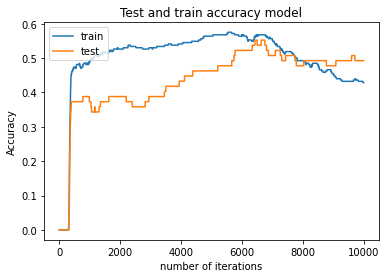

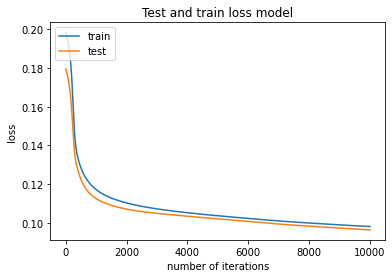

test accuracy 0.4925373134328358
train accuracy 0.42857142857142855


In [22]:
learningrate = 0.001
iterations = 10000
N = ytrainy.size

inputsize = 12
hiddensize = 266
outputsize = 2

results = pd.DataFrame(columns=["mse", "accuracy"])

np.random.seed(123)

W1 = np.random.normal(scale=0.5, size = (inputsize, hiddensize))
W2 = np.random.normal(scale=0.5, size = (hiddensize, outputsize))

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def meanse(ypred, ytrue):
  return ((ypred-ytrue)**2).sum()/(2*ypred.size)

def accuracy(ypred, ytrue):
  acc = ypred.argmax(axis=1)==ytrue.argmax(axis=1)
  return acc.mean()

atrain = []
atest = []
errortrain = []
errortest = []
for itr in range (iterations):

  Z1 = np.dot(xtrain, W1)
  A1 = sigmoid(Z1)

  Z2 = np.dot(A1, W2)
  A2 = sigmoid(Z2)

  V1 = np.dot(xtest, W1)
  B1 = sigmoid(V1)

  V2 = np.dot(B1, W2)
  B2 = sigmoid(V2)

  msetrain = meanse(A2, ytrainy)
  acctrain = accuracy(A2, ytrainy)

  atrain.append(acctrain)
  errortrain.append(msetrain)

  msetest = meanse(B2, ytesty)
  acctest = accuracy(B2, ytesty)

  atest.append(acctest)
  errortest.append(msetest)

  ##back propogation
  E1 = A2 - ytrainy
  dw1 = E1 * A2 * (1-A2)

  E2 = np.dot(dw1, W2.T)
  dw2 = E2 * A1 * (1-A1)

  W2update = np.dot(A1.T, dw1)/N
  W1update = np.dot(xtrain.T, dw2)/N

  W2 = W2 - learningrate * W2update
  W1 = W1 - learningrate * W1update

plt.plot(atrain)
plt.plot(atest)
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(errortrain)
plt.plot(errortest)
plt.title('Test and train loss model')
plt.ylabel('loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("test accuracy", atest[-1])
print("train accuracy", atrain[-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


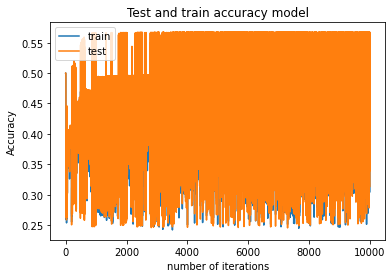

0.46487588271904684
0.53917527134718


In [23]:
class neuralnetwork(object):
  def __init__(self):
    self.inputsize = 12
    self.outputsize = 2
    self.hiddensize = 266

    self.W1 = np.random.randn(self.inputsize, self.hiddensize)
    self.W2 = np.random.randn(self.hiddensize, self.outputsize)
    self.bias = 0.0


  def feedforward(self, X):
    #forwsrd propogation
    # print(X.shape, self.W1.shape)
    self.z = (np.dot(X, self.W1)) + self.bias
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) ## dot product of hidden layer and 2nd set of weights
    output = self.sigmoid(self.z3)
    return output


  def sigmoid(self,s,deriv=False):
    if (deriv == True):
      return s * (1-2)
    return 1/(1+np.exp(-s))


  def backward(self, X, y, output):
    ## backward propogate through the network
    self.outputerror = y - output
    self.errormean = np.mean(y - output)
    self.outputdelta = self.outputerror * self.sigmoid(output, deriv=False)

    self.z2error = self.outputdelta.dot(self.W2.T) ## z2 error: how much out hidden layer weights contributes to output error
    self.z2delta = self.z2error * self.sigmoid(self.z2, deriv=True) ## applying derivative of sigmoid to z2 erroor

    self.update1 = 0.001* X.T.dot(self.z2delta)
    self.W1 += self.update1

    self.update2 = 0.001* self.z2.T.dot(self.outputdelta)
    self.W2 += self.update2

    # self.W1 += X.T.dot(self.z2delta) ## adjusting the first set
    # self.W2 += self.z2.T.dot(self.outputdelta)
    self.bias += self.errormean

  def train(self, X, y):
    output = self.feedforward(X)
    self.backward(X,y, output)

NN = neuralnetwork()

trainerror=[]
testerror=[]
for i in range(10000):
  NN.train(xtrain,ytrainy)
  trainerror.append((np.mean(np.square(ytrainy - NN.feedforward(xtrain)))))
  testerror.append(np.mean(np.square(ytesty - NN.feedforward(xtest))))

plt.plot(trainerror)
plt.plot(testerror)
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print(np.mean(np.square(ytrainy - NN.feedforward(xtrain))))
print(np.mean(np.square(ytesty - NN.feedforward(xtest))))